### sin 곡선 예측 RNN 모델 사용

In [2]:
# 필요한 모듈 임포트
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, LSTM, SimpleRNN

In [4]:
# time step만큼 시퀀스 데이터 분리
def split_sequencce(sequence, step):
  x, y = list(), list()

  for i in range(len(sequence)):
    end_idx = i + step
    if end_idx > len(sequence) - 1:
      break

    seq_x, seq_y = sequence[i:end_idx], sequence[end_idx]
    x.append(seq_x)
    y.append(seq_y)

  return np.array(x), np.array(y)

In [9]:
# sin 함수 학습 데이터
x = [i for i in np.arange(start=-10, stop=10, step=0.1)]
train_y = [np.sin(i) for i in x]

-10과 10 사이의 0.1 단위로 증가시켜 리스트에 저장

In [10]:
# 하이퍼 파라미터
n_timesteps = 15
n_features = 1

n_timesteps: 입력 시퀀스 길이 <br>
n_features: 입력 벡터의 차원 크기

In [11]:
# 시퀀스 나누기
# train_x.shape => (samples, timesteps)
# train_y.shape => (samples)
train_x, train_y = split_sequencce(train_y, step=n_timesteps)
print("shape x:{} / y:{}".format(train_x.shape, train_y.shape))

shape x:(185, 15) / y:(185,)


입력 시퀀스를 만들기 위하여 split_sequence() 함수 호출 - 리스트에서 n_timesteps만큼 나눠서 생성<br>



In [13]:
# RNN 입력 벡터 크기를 맞추기 위해 벡터 차원 크기 변경
# reshape from [smaples, timesteps] into [samples, timesteps, features]
train_x = train_x.reshape(train_x.shape[0], train_x.shape[1], n_features)
print("train_x.shape = {}".format(train_x.shape))
print("train_y.shape = {}".format(train_y.shape))

train_x.shape = (185, 15, 1)
train_y.shape = (185,)


RNN 계층을 이용하려면 3차원 텐서tenser 형태여야 한다.<br>
그래서 2차원 train_x를 3차원으로 변환<br>

In [14]:
# RNN 모델 정의
model = Sequential()
model.add(SimpleRNN(units=10,
                    return_sequences=False,
                    input_shape=(n_timesteps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

SimpleRNN 계층은 Dense 계층 1개로 구성되어 있음<br>
가장 간단한 RNN 계층
인자
- unit: 전체 뉴런 수
- return_sequences: 과정 출력 여부
- input_shape: one-to-many, many-to-many를 위해 생성

손실함수: mse<br>
옵티마이저: adam

In [ ]:
# 모델 학습
np.random.seed(0)
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(
    monitor='loss',
    patience=5,
    mode='auto')
history = model.fit(train_x, train_y, epochs=1000, callbacks=[early_stopping])

인자
- 데이터셋
- 에포크값
- 콜백 객체: 갑자기 종료되는 시점 반환

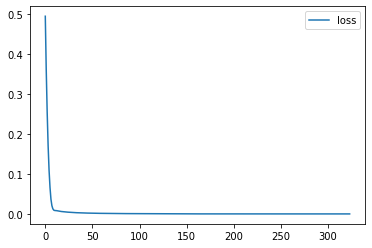

In [18]:
# loss 그래프 생성
plt.plot(history.history['loss'], label='loss')
plt.legend(loc="upper right")
plt.show()

In [20]:
# 테스트 데이터셋 생성
test_x = np.arange(10, 20, 0.1)
calc_y = np.cos(test_x) # 테스트 정답 데이터

calc_y 리스트에 전체 시퀀스값 저장<br>
cos함수를 사용하여 학습 데이터에 주기적 차이를 줌

In [ ]:
# RNN 모델 예측 및 로그 저장
test_y = calc_y[:n_timesteps]
for i in range(len(test_x) - n_timesteps):
  net_input = test_y[i : i + n_timesteps]
  net_input = net_input.reshape((1, n_timesteps, n_features))
  train_y = model.predict(net_input, verbose=0)
  print(test_y.shape, train_y.shape, i, i + n_timesteps)
  test_y = np.append(test_y, train_y)

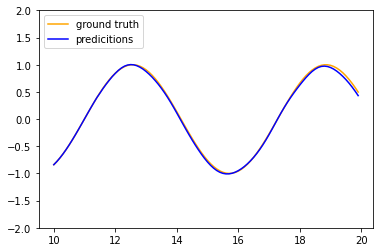

In [23]:
# 예측 결과 그래프 그리기
plt.plot(test_x, calc_y, label="ground truth", color="orange")
plt.plot(test_x, test_y, label="predicitions", color="blue")

plt.legend(loc='upper left')
plt.ylim(-2, 2)
plt.show()